In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.sample()


,Weight,Height
18,76,150


Text(0, 0.5, 'height')

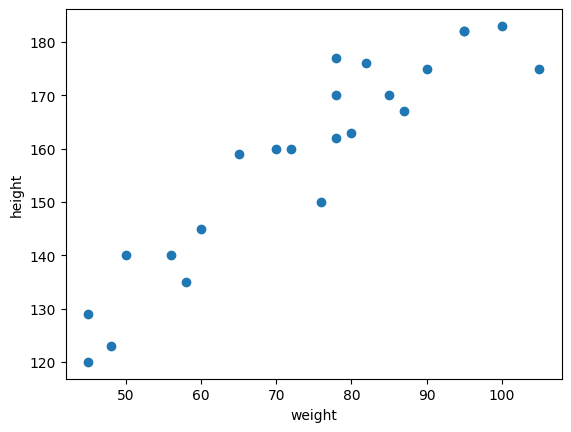

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')


In [7]:
## Correlation
df.corr()

#correlation of .9 --> highly correalted positively

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


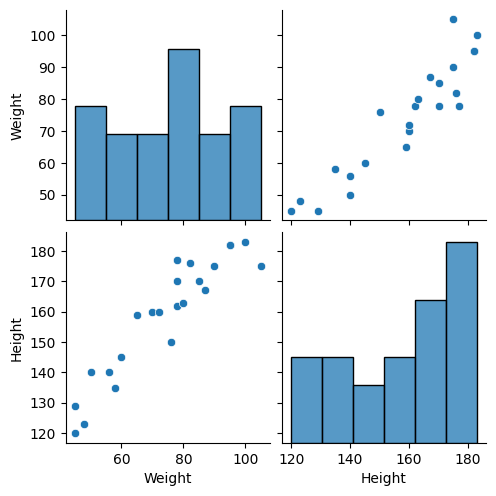

In [8]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [10]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray and denoted by X
y=df['Height'] ## this variiable can be in series or 1d array and denoted by y


In [ ]:
np.array(X) #2d array

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

In [ ]:
np.array(X).shape  #23 rows one column

(23, 1)

In [15]:
np.array(y).shape
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [ ]:
X_train.shape #75 % data used for training

(17, 1)

In [18]:
#Standarization
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.transform(X_test)

In [19]:
X_train


array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [20]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [22]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
regression.coef_

array([17.2982057])

In [24]:
regression.intercept_

np.float64(156.47058823529412)

In [25]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


In [ ]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [26]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [27]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [29]:
from sklearn.metrics import r2_score

In [30]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [31]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [36]:
## OLS Linear Regression
import statsmodels.api as sm

In [35]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 4.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 4.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 4.2 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 4.0 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.0 MB/s eta 0:00:00

   ---------------

In [37]:
model=sm.OLS(y_train,X_train).fit()

In [38]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 02 Jun 2025   Prob (F-statistic):                       0.664
Time:                        14:31:58   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Hp\Desktop\aiml\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
#prediction for new data
regression.predict([[72]])

array([1401.94139895])

In [41]:
regression.predict(sclaer.transform([[72]]))

c:\Users\Hp\Desktop\aiml\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])